# 1. Lý thuyết

**1) Để khởi tạo model trong tensorflow chúng ta sử dụng class nào?**

**A. Sequential hoặc Model (Đúng)**

B. Dense

C. Adam

D. Variable

**2) Điểm khác biệt giữa fit và fit_generator trong tensorflow là gì ?**

**A. fit sẽ yêu cầu load toàn bộ dữ liệu lên RAM trong khi fit_generator sẽ sử dụng một hàm generator để sinh dữ liệu tại mỗi mini-batch. Từ đó giúp tiết kiệm bộ nhớ. (Đúng)**

B. fit sẽ sử dụng hàm generator để sinh dữ liệu tại thời điểm huấn luyện còn fit_generator sẽ load toàn bộ dữ liệu.

C. fit sẽ huấn luyện model theo mini-batch còn fit_generator thì huấn luyện trên toàn bộ dataset.

D. trong hàm fit chúng ta có thể khai báo tập validation dataset còn trong fit_generator thì không.


**3) Các modules chính trong tensorflow dùng để xây dựng và huấn luyện model.**

A. `tf.keras.layers`: khởi tạo activation function; `tf.keras.Sequential`: khởi tạo model; `tf.keras.activations`: để khởi tạo các layers; `tf.keras.optimizers`: Khởi tạo optimizer cho bài toán tối ưu loss function; `tf.keras.losses`: khởi tạo loss function; `tf.keras.preprocessing`: Preprocessing data.

**B**. `tf.keras.layers`: để khởi tạo các layers; `tf.keras.Sequential`: khởi tạo model; `tf.keras.activations`: khởi tạo activation function; `tf.keras.optimizers`: Khởi tạo optimizer cho bài toán tối ưu loss function; `tf.keras.losses`: khởi tạo loss function; `tf.keras.preprocessing`: Preprocessing data.**(Đúng)**

C. `tf.keras.layers`: để khởi tạo các layers; `tf.keras.Sequential`: Preprocessing data; `tf.keras.activations`: khởi tạo activation function; `tf.keras.optimizers`: Khởi tạo optimizer cho bài toán tối ưu loss function; `tf.keras.losses`: khởi tạo loss function; `tf.keras.preprocessing`: khởi tạo model

D. `tf.keras.layers`: để khởi tạo các layers; `tf.keras.Sequential`: khởi tạo model; `tf.keras.activations`: khởi tạo activation function; `tf.keras.optimizers`: khởi tạo loss function; `tf.keras.losses`: Khởi tạo optimizer cho bài toán tối ưu loss function; `tf.keras.preprocessing`: Preprocessing data.


**4) Các bước trong huấn luyện model bao gồm:**

A. 1. Train/test data split --> 2. Initialize the optimizer algorithm --> 3. Build up model architecture --> 4. Train model on train --> 5. Evaluation on test --> 6. Save and use trained model

B. 1. Train/test data split --> 2. Build up model architecture --> 3. Train model on train --> 4. Initialize the optimizer algorithm --> 5. Evaluation on test --> 6. Save and use trained model

C. 1. Train/test data split --> 2. Build up model architecture --> 3. Initialize the optimizer algorithm --> 4. Evaluation on test --> 5. Train model on train --> 6. Save and use trained model

**D. 1. Train/test data split --> 2. Build up model architecture --> 3. Initialize the optimizer algorithm --> 4. Train model on train --> 5. Evaluation on test --> 6. Save and use trained model(Đúng)**

------------------------------

**5) Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?**

A. epochs là kích thước của một mini-batch, batch_size là số lượt lặp lại toàn bộ dữ liệu khi huấn luyện.

B. epochs là số lượt lặp lại toàn bộ dữ liệu validation khi huấn luyện, batch_size là kích thước của một mini-batch.

**C. epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.(Đúng)**

D. epochs là số lượng vòng lặp, mỗi vòng lặp là một lượt fit mini-batch, trên bộ dữ liệu khi huấn luyện; batch_size là kích thước của một mini-batch.

# 2. Thực hành

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/t/090688c8d33a40b68be9e271d6ba6bae) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20. 

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.

In [ ]:
import tensorflow as tf

A = tf.random.normal([32, 32, 3],dtype=tf.float64)
# Kích thước của tensor
print("shape of A: " , A.shape)

# Số chiều 
print("total dim: ", A.ndim)

# Định dạng dữ liệu
print("dtype: ", A.dtype)

shape of A:  (32, 32, 3)
total dim:  3
dtype:  <dtype: 'float64'>


In [ ]:
B = tf.transpose(A)
print(B.shape)

(3, 32, 32)


In [ ]:
R=B[0][:, :]
print(R.shape)
G=B[1][:, :]
print(G.shape)
B=B[2][:, :]
print(B.shape)

(32, 32)
(32, 32)
(32, 32)


In [ ]:
hada_RG = R*G
print(hada_RG.shape)

(32, 32)


In [ ]:
inner_RG = R@G
print(inner_RG.shape)

(32, 32)


#Cau 9-10

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks')
!ls income_classification

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test.csv  train.csv


##Understanding data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
train_df = pd.read_csv("income_classification/train.csv")
test_df = pd.read_csv("income_classification/test.csv")

In [ ]:
train_df.head()

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,0,45,Private,175925,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
1,1,23,Private,113601,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,M,0,0,30,US,0
2,2,22,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,F,0,0,20,South,0
3,3,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,M,0,0,40,US,0
4,4,18,Private,375515,11th,7,Never-married,Sales,Own-child,White,F,0,0,20,US,0


In [ ]:
train_df.describe()

,ID,age,final_weight,total_education_yrs,capital_gain,capital_loss,hrs_per_week,target_income
count,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,12499.500000,38.568800,1.900156e+05,10.079160,1051.950240,86.053160,40.392200,0.23944
std,7217.022701,13.642694,1.059694e+05,2.566125,7228.975017,400.535454,12.350547,0.42675
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.00000
25%,6249.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.00000
50%,12499.500000,37.000000,1.786440e+05,10.000000,0.000000,0.000000,40.000000,0.00000
75%,18749.250000,48.000000,2.368040e+05,12.000000,0.000000,0.000000,45.000000,0.00000
max,24999.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.00000


In [ ]:
train_df.shape

(25000, 16)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   25000 non-null  int64 
 1   age                  25000 non-null  int64 
 2   work_type            25000 non-null  object
 3   final_weight         25000 non-null  int64 
 4   education            25000 non-null  object
 5   total_education_yrs  25000 non-null  int64 
 6   marital_state        25000 non-null  object
 7   job                  25000 non-null  object
 8   status               25000 non-null  object
 9   ethnicity            25000 non-null  object
 10  sex                  25000 non-null  object
 11  capital_gain         25000 non-null  int64 
 12  capital_loss         25000 non-null  int64 
 13  hrs_per_week         25000 non-null  int64 
 14  nationality          25000 non-null  object
 15  target_income        25000 non-null  int64 
dtypes: i

In [ ]:
train_df.isnull().sum()

ID                     0
age                    0
work_type              0
final_weight           0
education              0
total_education_yrs    0
marital_state          0
job                    0
status                 0
ethnicity              0
sex                    0
capital_gain           0
capital_loss           0
hrs_per_week           0
nationality            0
target_income          0
dtype: int64

Bộ dữ liệu không có missing values

In [ ]:
#Kiểm tra ký tự '?' trong dataset
def cc(x):
    return sum(x=='?')
train_df.apply(cc)

ID                        0
age                       0
work_type              1379
final_weight              0
education                 0
total_education_yrs       0
marital_state             0
job                    1384
status                    0
ethnicity                 0
sex                       0
capital_gain              0
capital_loss              0
hrs_per_week              0
nationality             443
target_income             0
dtype: int64

In [ ]:
train_df.replace('?', np.nan, inplace = True)

In [ ]:
#Kiểm tra ký tự '?' trong dataset
def cc(x):
    return sum(x=='?')
train_df.apply(cc)

ID                     0
age                    0
work_type              0
final_weight           0
education              0
total_education_yrs    0
marital_state          0
job                    0
status                 0
ethnicity              0
sex                    0
capital_gain           0
capital_loss           0
hrs_per_week           0
nationality            0
target_income          0
dtype: int64

##Visualization

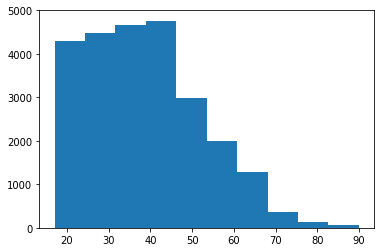

In [ ]:
plt.hist(train_df['age']);

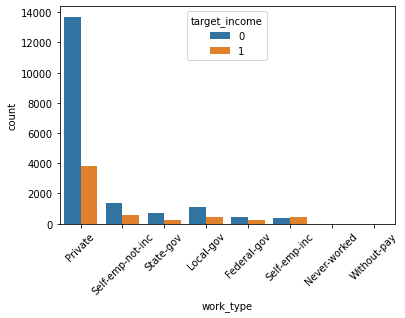

In [ ]:
#work_type vs target_incom
sns.countplot(x = 'work_type', hue = 'target_income', data = train_df)
plt.xticks(rotation=45);

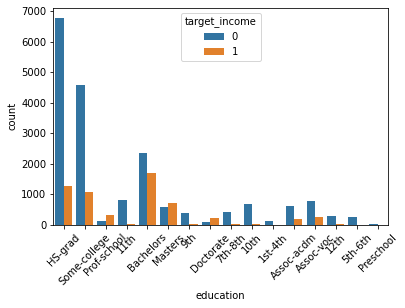

In [ ]:
#education vs target_incom
sns.countplot(x = 'education', hue = 'target_income', data = train_df)
plt.xticks(rotation=45);

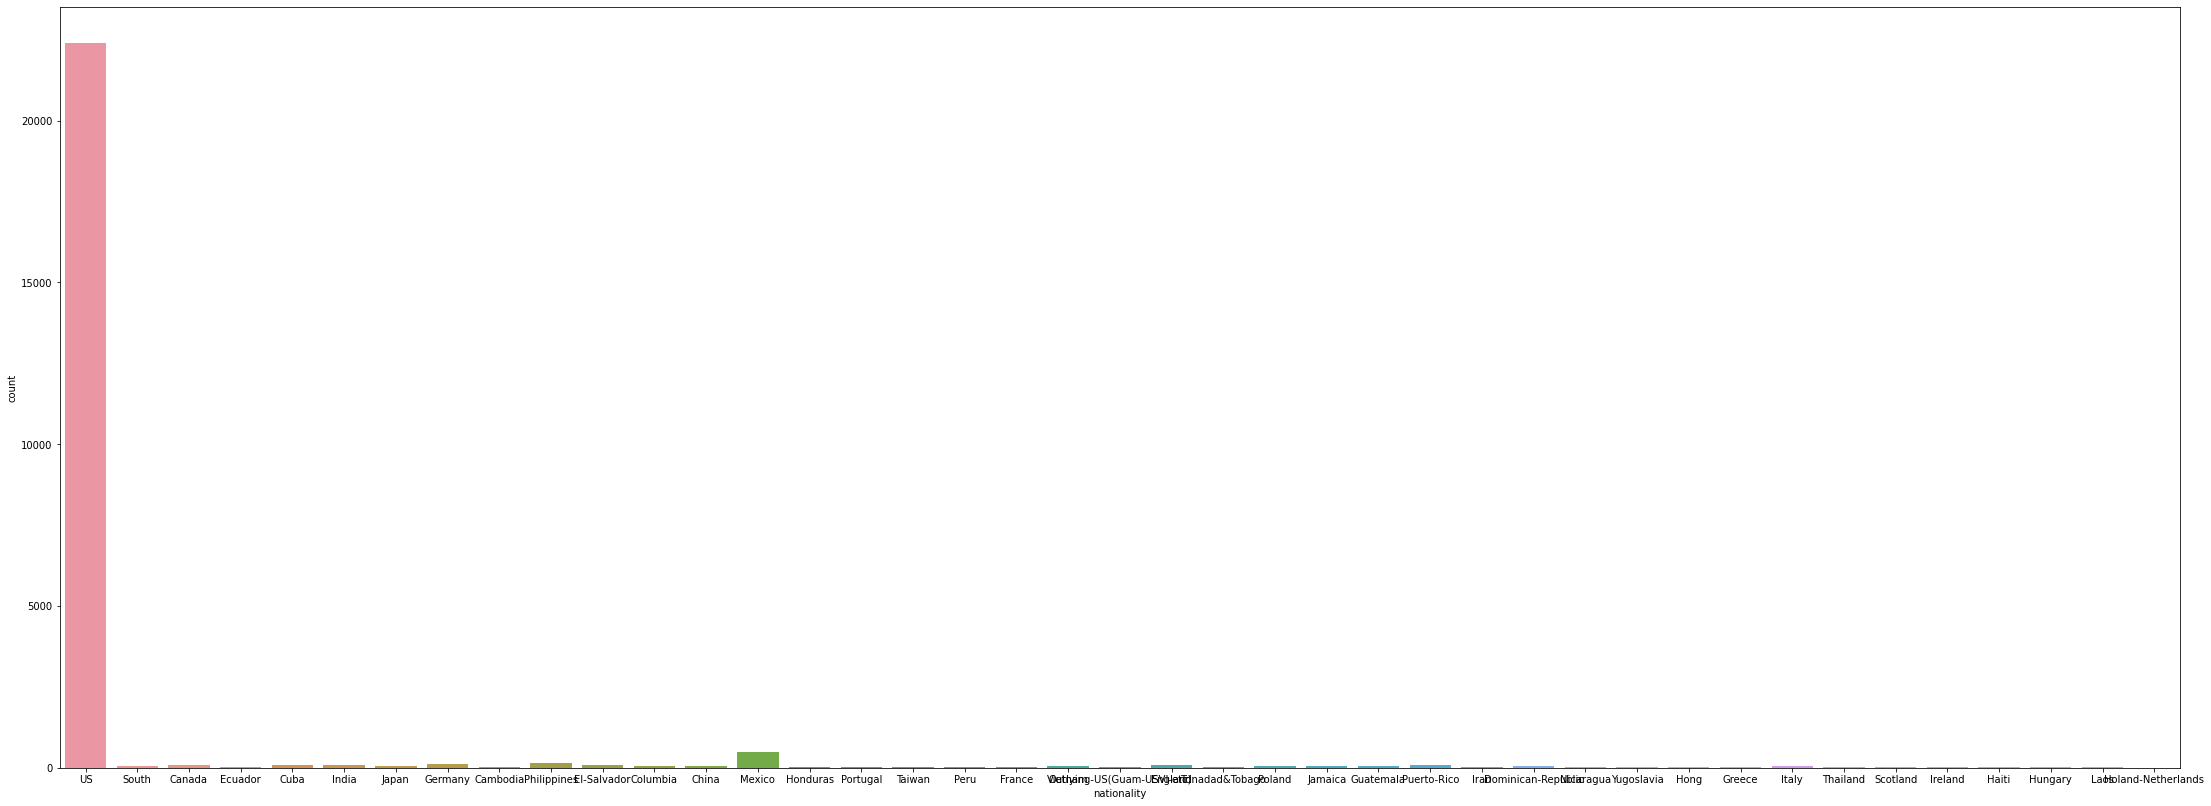

In [ ]:
#explore which country do most people belong
plt.figure(figsize=(38,14))
sns.countplot(x='nationality',data=train_df)
plt.show()

Các quan sát từ `US` khá nhiều nên chúng ta có thể gộp các nước khác thành `Other`

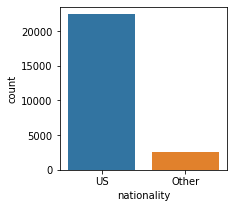

In [ ]:
train_df.loc[train_df['nationality']!='US','nationality'] = 'Other'
test_df.loc[test_df['nationality']!='US','nationality'] = 'Other'
plt.figure(figsize=(3,3))
sns.countplot(x='nationality',data=train_df)
plt.show()

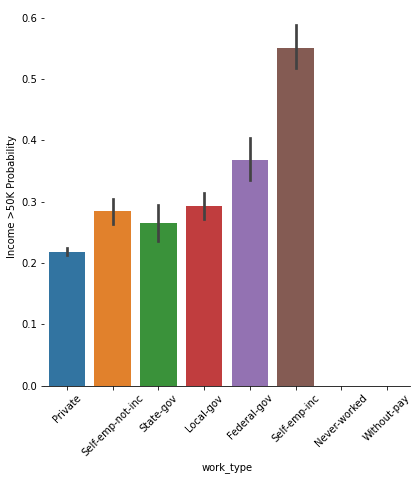

In [ ]:
# Income >50K Probability with work_type
g = sns.catplot(x='work_type',y='target_income',data=train_df,kind='bar',height=6)
plt.xticks(rotation=45)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

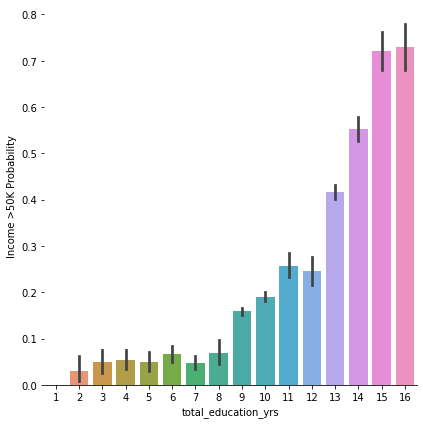

In [ ]:
# Income >50K Probability with Total Edu Years
g = sns.catplot(x='total_education_yrs',y='target_income',data=train_df,kind='bar',height=6)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

Trình độ học vấn càng cao thì thu nhập càng cao (Điều này khá rõ ràng)

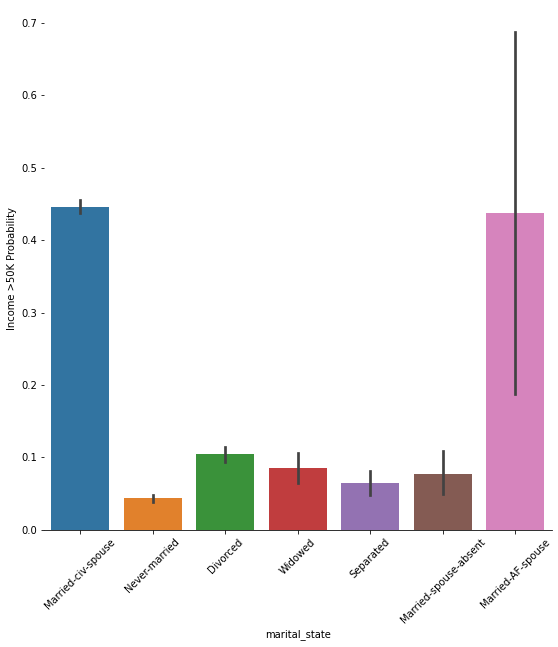

In [ ]:
# Income >50K Probability with marital_state
g = sns.catplot(x='marital_state',y='target_income',data=train_df,kind='bar',height=8)
plt.xticks(rotation=45)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


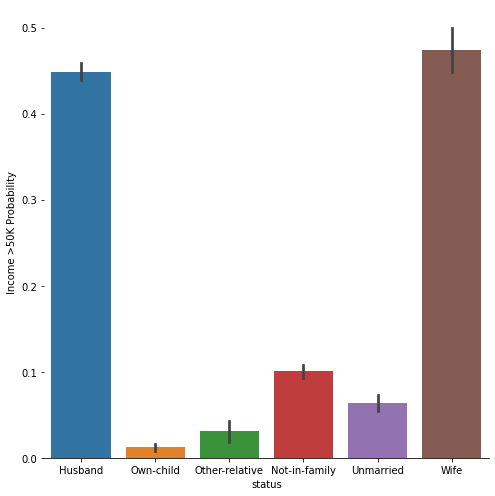

In [ ]:
# Income >50K Probability with status
g = sns.catplot(x='status',y='target_income',data=train_df,kind='bar',size=7)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show();

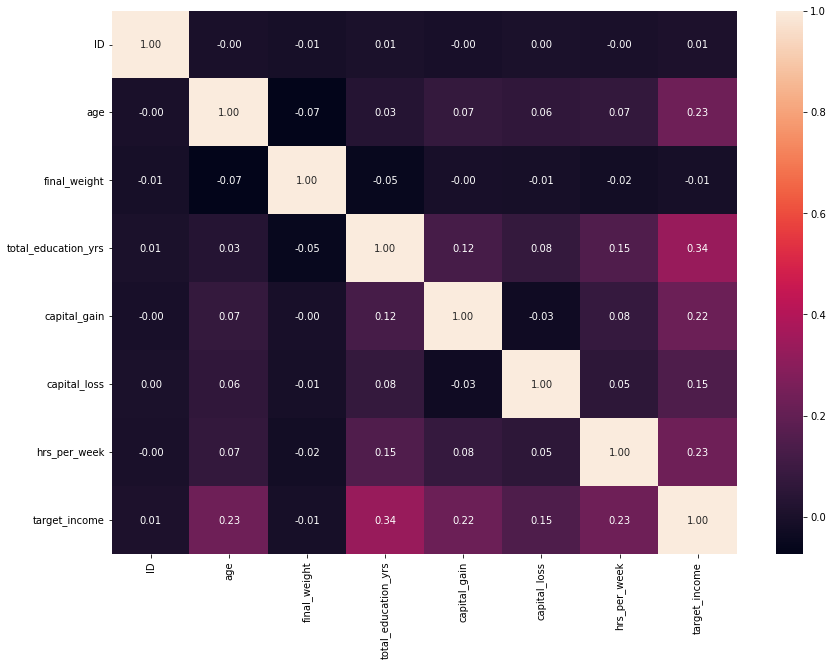

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(train_df.corr(),annot=True,fmt='.2f')
plt.show()

##Preparing Data

In [ ]:
cat_col = ['work_type','job','status','ethnicity','sex','nationality']
for col in cat_col:
  train_df = pd.concat([train_df, pd.get_dummies(train_df[col],prefix=col,prefix_sep=':')], axis=1)
  train_df.drop(col,axis=1,inplace=True)
  test_df = pd.concat([test_df, pd.get_dummies(test_df[col],prefix=col,prefix_sep=':')], axis=1)
  test_df.drop(col,axis=1,inplace=True)

Vì `marital_state` và `education` có mối tương quan lớn với `job` và `total_edu_years` nên chúng ta có thể bỏ hai cột này

In [ ]:
train_df=train_df.drop(['marital_state','education'],axis=1)
test_df=test_df.drop(['marital_state','education'],axis=1)


In [ ]:
Y_test = test_df

In [ ]:
Y_test.head()

,ID,age,final_weight,total_education_yrs,capital_gain,capital_loss,hrs_per_week,work_type:?,work_type:Federal-gov,work_type:Local-gov,work_type:Never-worked,work_type:Private,work_type:Self-emp-inc,work_type:Self-emp-not-inc,work_type:State-gov,work_type:Without-pay,job:?,job:Adm-clerical,job:Armed-Forces,job:Craft-repair,job:Exec-managerial,job:Farming-fishing,job:Handlers-cleaners,job:Machine-op-inspct,job:Other-service,job:Priv-house-serv,job:Prof-specialty,job:Protective-serv,job:Sales,job:Tech-support,job:Transport-moving,status:Husband,status:Not-in-family,status:Other-relative,status:Own-child,status:Unmarried,status:Wife,ethnicity:Amer-Indian-Eskimo,ethnicity:Asian-Pac-Islander,ethnicity:Black,ethnicity:Other,ethnicity:White,sex:F,sex:M,nationality:Other,nationality:US
0,25000,59,104216,15,0,0,25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,25001,41,76625,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,25002,66,28061,4,0,0,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
3,25003,29,211299,11,0,0,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
4,25004,35,340110,13,0,1848,70,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
# Separating into dependent and independent variables

X_train = np.array(train_df.drop(['target_income'],1))
y_train = np.array(train_df['target_income'])

#Scaling the data

from sklearn import preprocessing
X_train = preprocessing.scale(X_train)

# Splitting the data into train and validation sets

from sklearn.model_selection import train_test_split

xtrain,xval,ytrain,yval = train_test_split(X_train,y_train,test_size = 0.2,random_state = 30)

##Define a neural network

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

inpt = Input(shape = (44))
hidden_1 = Dense(88)(inpt)
act1 = Activation('relu')(hidden_1)
hidden_2 = Dense(88)(act1)
act2 = Activation('relu')(hidden_2)
hidden_3 = Dense(2)(act2)
output = Activation('sigmoid')(hidden_3)
model = Model(inputs = [inpt], outputs = [output])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 44)]              0         
                                                                 
 dense (Dense)               (None, 88)                3960      
                                                                 
 activation (Activation)     (None, 88)                0         
                                                                 
 dense_1 (Dense)             (None, 88)                7832      
                                                                 
 activation_1 (Activation)   (None, 88)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 267       
                                                                 
 activation_2 (Activation)   (None, 3)                 0     

In [ ]:
# Loss function and optimizer
opt = Adam()
model = model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##Training Model

In [ ]:
# Training Model
model.fit(xtrain,ytrain,
          validation_data = (xval,yval),
          epochs = 100,
          batch_size = 10)

Epoch 1/100
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3464 - accuracy: 0.8392 - val_loss: 0.3262 - val_accuracy: 0.8522
Epoch 2/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3125 - accuracy: 0.8547 - val_loss: 0.3187 - val_accuracy: 0.8534
Epoch 3/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3065 - accuracy: 0.8587 - val_loss: 0.3165 - val_accuracy: 0.8614
Epoch 4/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3007 - accuracy: 0.8611 - val_loss: 0.3108 - val_accuracy: 0.8602
Epoch 5/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8622 - val_loss: 0.3158 - val_accuracy: 0.8618
Epoch 6/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2924 - accuracy: 0.8638 - val_loss: 0.3208 - val_accuracy: 0.8570
Epoch 7/100
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2884 - accuracy: 0.8665 - val_loss: 0.3269 - val_ac

#Chữa: Nên có phần hiển thị kết quả của mô hình cuối cùng sau khi đã huấn luyện. Có thể thêm các đồ thì hàm loss,accuracy, confusion matrix để nhận xét kết quả.